In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [5]:
ucdata = pd.read_csv("./datasets/Portugal_Election_Data-Copy1.csv")

In [6]:
ucdata.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [9]:
# Unique teritories in portugal
print(ucdata['Party'].unique())

['PS' 'PPD/PSD' 'B.E.' 'CDS-PP' 'PCP-PEV' 'PAN' 'CH' 'R.I.R.' 'PCTP/MRPP'
 'A' 'L' 'IL' 'JPP' 'NC' 'PDR' 'PNR' 'PURP' 'PPM' 'MPT' 'PTP' 'MAS']


<div class="alert alert-success">
    <b>Finding:</b><br/>
   "Território Nacional" refers to portugal as a nation, not a serparate district as others. (Madeira, and Açores) are Autonomous regions in Portugal
</div> 

In [12]:
# parties in portugal
display(ucdata['Party'].unique())
# number
display(ucdata['Party'].nunique())

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

21

<div class="alert alert-success">
    <b>Finding:</b><br/>
   There are 21 distinct parties in Portugual.
</div> 

In [10]:
# Number of parishes in portugal
ucdata[ucdata['territoryName'] == "Território Nacional"]['numParishes'].nunique()

1

In [22]:
for district in ucdata['territoryName'].unique():
    print(f" no: of parishes in {district} = {ucdata[ucdata['territoryName'] == district]['numParishes'].unique()}")

 no: of parishes in Território Nacional = [3092]
 no: of parishes in Aveiro = [147]
 no: of parishes in Beja = [75]
 no: of parishes in Braga = [347]
 no: of parishes in Bragança = [226]
 no: of parishes in Castelo Branco = [120]
 no: of parishes in Coimbra = [155]
 no: of parishes in Évora = [69]
 no: of parishes in Faro = [67]
 no: of parishes in Guarda = [242]
 no: of parishes in Leiria = [110]
 no: of parishes in Lisboa = [134]
 no: of parishes in Madeira = [54]
 no: of parishes in Portalegre = [69]
 no: of parishes in Porto = [243]
 no: of parishes in Santarém = [141]
 no: of parishes in Setúbal = [55]
 no: of parishes in Viana do Castelo = [208]
 no: of parishes in Vila Real = [197]
 no: of parishes in Viseu = [277]
 no: of parishes in Açores = [156]


<div class="alert alert-success">
    <b>Finding:</b><br/>
    It is clear that as with india the number of parishes (3rd tier local body) in Protugal in constant for district/nation.
</div> 

In [21]:
# Number of approved parishes in portugal
ucdata[ucdata['territoryName'] == "Território Nacional"]['numParishesApproved'].unique()

array([1081,  918, 2131, 2229, 2302, 2386, 2457, 2478, 2568, 2614, 2739,
       2793, 2836, 2867, 2907, 2920, 2936, 2954, 2982, 2993, 3008, 3023,
       3027, 3045, 3055, 3060, 3064, 3068, 3071, 3072, 3075, 3083, 3086,
       3087, 3088, 3089, 3090, 3091, 3092], dtype=int64)

<div class="alert alert-success">
    <b>Finding:</b><br/>
    It seems like numParishesApproved is a dynamic field which max out to NumParishes during election hours.
</div> 

<div class="alert alert-success">
    <b>Finding:</b><br/>
    Out of total 21 disticnt parties, only 3 (Porto, Braga, Leiria) districts as presence of all 21 parties. Vila Real has
    minimum with 16 parties.
</div> 

<AxesSubplot:xlabel='territoryName', ylabel='totalVoters'>

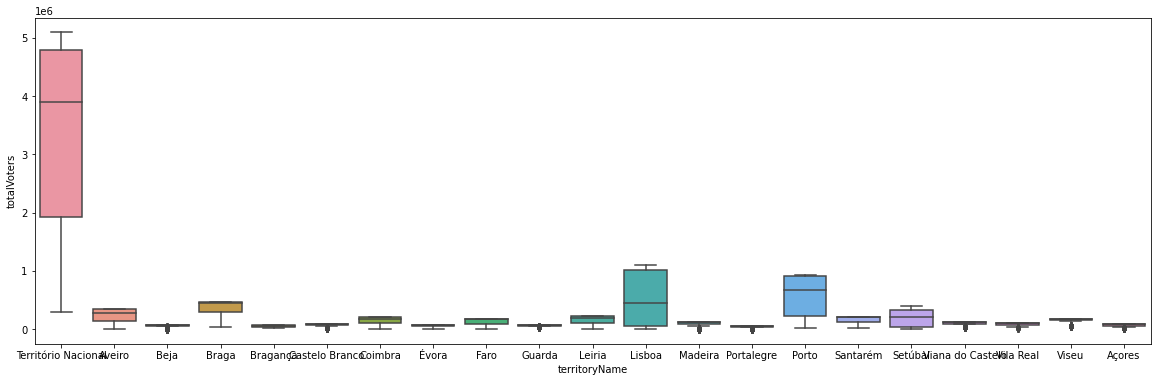

In [18]:
#Distribution of total voters across territory
plt.figure(figsize = (20, 6))
sns.boxplot(x = 'territoryName', y = 'totalVoters', data = ucdata)

<div class="alert alert-success">
    <b>Finding:</b><br/>
    Maximum voters are present in the district "Lisboa", followed by "Porto".
</div> 

In [19]:
ucdata.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21629.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.163600e+04,21643.000000,21643.000000,21643.000000,21631.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621451,6148.068752,1.961471,51.983722,6.275367e+05,3.391223e+05,7608.001386,2.071985,5914.629950,1.777482,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795253,14735.469269,0.375250,4.854380,1.525590e+06,8.291641e+05,18493.107257,0.518025,14236.038023,0.388833,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.057795e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [17]:
ucdata.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [6]:
columnset1 = ['TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes']

### 1. Unique values

In [ ]:
print(f'Count of unique values :: \n{ucdata[columnset1].nunique()}')
print(f'\nDatatypes for 1st column set :: \n{ucdata[columnset1].dtypes}')

Count of unique values :: 
TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64


NameError: name 'columnset1' is not defined

### 2. Check for Null values

In [19]:
ucdata.isna().sum()

TimeElapsed                  0
time                         0
territoryName                0
totalMandates                0
availableMandates            0
numParishes                  0
numParishesApproved          0
blankVotes                   0
blankVotesPercentage        14
nullVotes                    0
nullVotesPercentage          0
votersPercentage             0
subscribedVoters             0
totalVoters                  7
pre.blankVotes               0
pre.blankVotesPercentage     0
pre.nullVotes                0
pre.nullVotesPercentage     12
pre.votersPercentage         0
pre.subscribedVoters         0
pre.totalVoters              0
Party                        0
Mandates                     0
Percentage                   0
validVotesPercentage         0
Votes                        0
Hondt                        0
FinalMandates                0
dtype: int64

#### **Findings:**
>No null values are present in the 1st set of columns. Since the 2 columns "time" and "territoryName" are of type object, we need to check for special
    characters that may present in them.

In [412]:
ucdata[ucdata.isnull().any(axis=1)].shape #total dataset null row count

(33, 28)

### 3. Check for special characters

In [56]:
validTimeFormat = ":-" + string.whitespace + string.digits

In [22]:
validTimeFormat = ":-" + string.whitespace + string.digits
col = 'time'
print(f'Any special characters present in {col}? --> {ucdata[col].str.strip(validTimeFormat).astype(bool).any()}')

Any special characters present in time? --> False


#### **Findings:**
>Time does not have any special characters apart from : and - , which represent time params. 

In [23]:
col = 'territoryName'
print(f'Values of {col} ::\n{ucdata[col].unique()}')

Values of territoryName ::
['Território Nacional' 'Aveiro' 'Beja' 'Braga' 'Bragança' 'Castelo Branco'
 'Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Madeira'
 'Portalegre' 'Porto' 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real'
 'Viseu' 'Açores']


#### **Findings:**
>Since the name are in portugese, we can ignore the special characters present.

### 4. Check for duplicate rows

In [95]:
ucdata[ucdata.duplicated()]

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates


#### **Findings:**
>No duplicate rows are present in the dataset 

### 5. Univariate Analysis

In [112]:
columnset1

['TimeElapsed',
 'time',
 'territoryName',
 'totalMandates',
 'availableMandates',
 'numParishes']

#### **Observation:**
>Both TimeElapsed and time are time-components for the dataset. They span 4hr 25mins. 

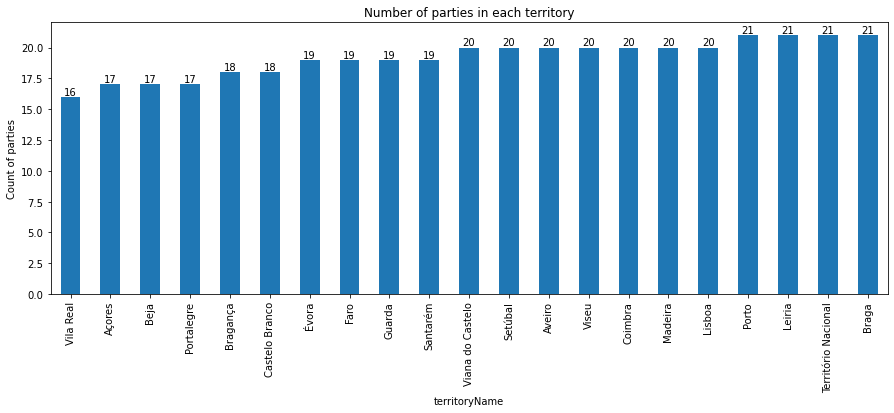

In [379]:
#Number of parties in each terrritory
plt.figure(figsize=(15,5))
ax = ucdata.groupby('territoryName')['Party'].nunique().sort_values().plot(kind = 'bar', ylabel = "Count of parties", title ="Number of parties in each territory")
ax.bar_label(ax.containers[0])
plt.show()

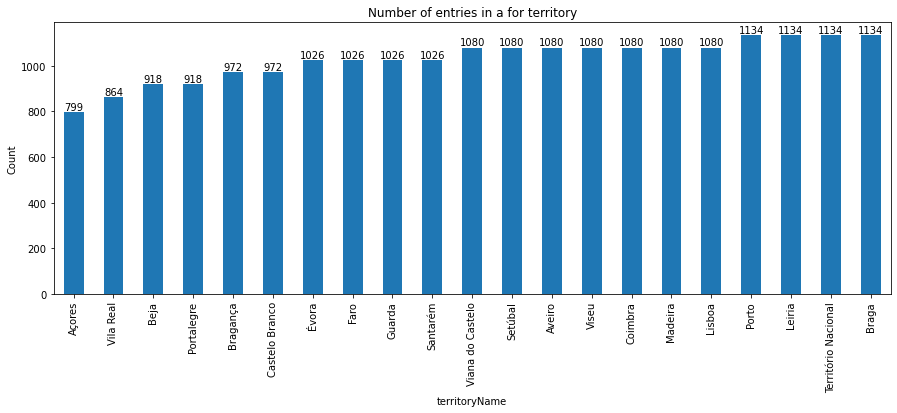

In [319]:
# territoryName analysis
plt.figure(figsize=(15,5))
ax = ucdata.groupby('territoryName').size().sort_values().plot(kind = 'bar', ylabel = 'Count', title = "Number of entries in a for territory")
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings:**
>Above graph shows the count of data for 20 district along with whole nation. Count of values present for district are different.

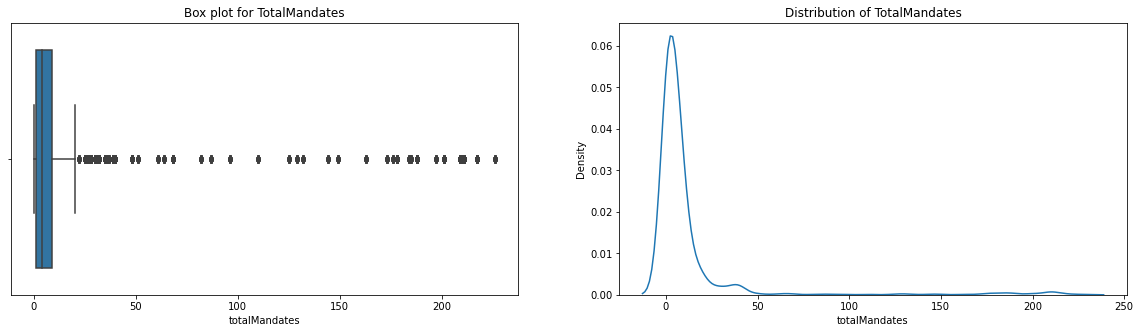

In [193]:
# Total Mandates analysis
fig , (a1, a2) = plt.subplots(ncols = 2, figsize = (20,5))
sns.boxplot(x = 'totalMandates', data = ucdata, ax=a1)
a1.set_title('Box plot for TotalMandates')
sns.kdeplot(x = 'totalMandates', data = ucdata, ax=a2)
a2.set_title('Distribution of TotalMandates')
plt.show()

#### **Findings:**
>1. TotalMandates represent 'No of MPs elected at that point of time'. So it is a dynamic variable. It increases for each district as time passses.
2. The "outliers" shown in box plot can be ignored as they represent a valid value in a particular time frame. 
3. From the distribution it is clear that for most time-period in dataset "totalMandates" equals "zero". This is a valid case as we know in election, count of elected members only increase towards end of counting.

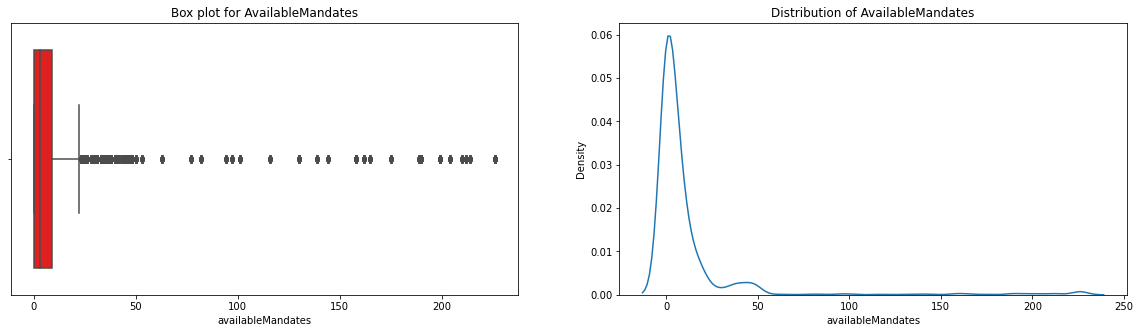

In [16]:
# Available Mandates analysis
fig , (a1, a2) = plt.subplots(ncols = 2, figsize = (20,5))
sns.boxplot(x = 'availableMandates', data = ucdata, ax=a1, color = 'r')
a1.set_title('Box plot for AvailableMandates')
sns.kdeplot(x = 'availableMandates', data = ucdata, ax=a2)
a2.set_title('Distribution of AvailableMandates')
plt.show()

#### **Findings:**
>1. AvailableMandates represent 'No of MPs left to be elected at that point of time'.
2. This is negation for "totalMandates". Values and their distribution follows same behaviuor as that of "totalMandated", but in reverse order.

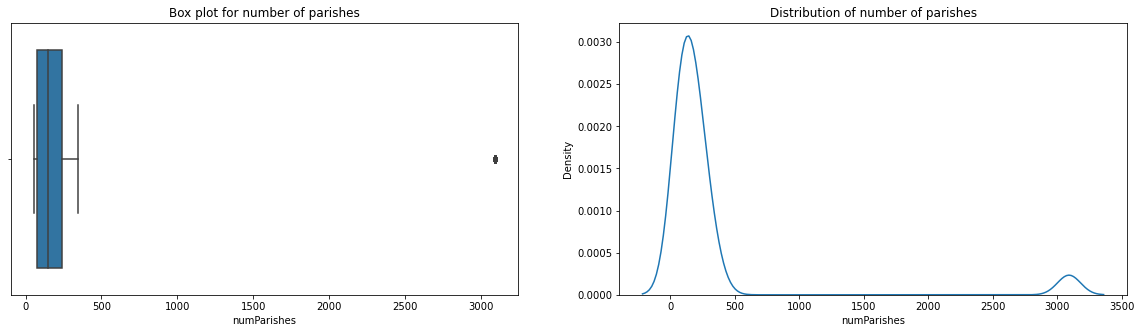

In [196]:
# numParishes analysis
fig , (a1, a2) = plt.subplots(ncols = 2, figsize = (20,5))
sns.boxplot(x = 'numParishes', data = ucdata, ax=a1)
a1.set_title('Box plot for number of parishes')
sns.kdeplot(x = 'numParishes', data = ucdata, ax=a2)
a2.set_title('Distribution of number of parishes')
plt.show()

#### **Findings:**
>1. NumParishes represents 'Total number of parishes in a location'. 
2. From the boxplot it is clear that one value is way too large. 
3. This value is "the count for entire portugal nation" i.e. "Território Nacional". It is sum of all district values.
4. From distribution it is clear that each district has parish count between 0 to 500.

### 6. Multivariate Analysis

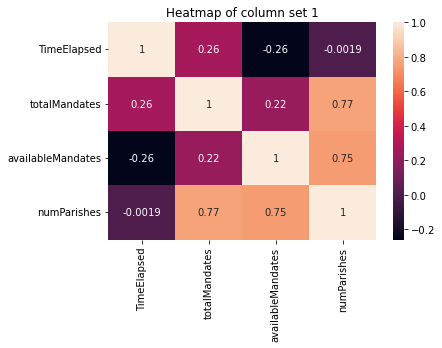

In [203]:
columnset1_data = ucdata[columnset1]
sns.heatmap(columnset1_data.corr(), annot=True)
plt.title('Heatmap of column set 1')
plt.show()

#### **Findings:**
>1. Multicolinearity in column set 1 is less.

##### Q1: How does "Final Mandates" varies with time elapsed for each territory?

<AxesSubplot:xlabel='territoryName', ylabel='FinalMandates'>

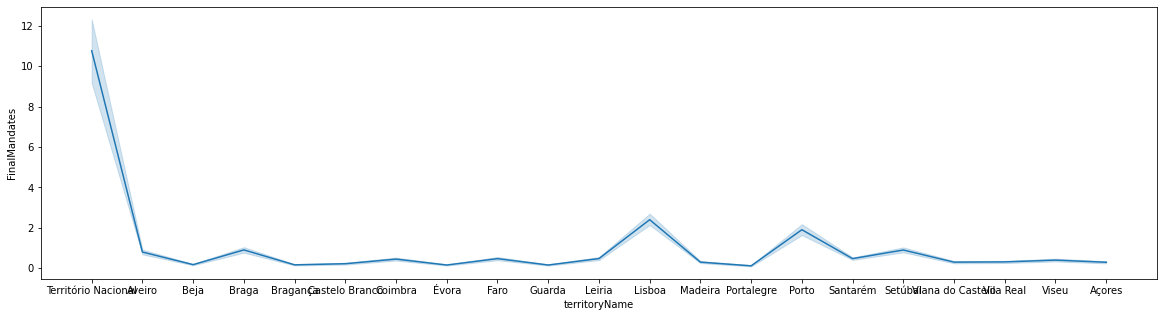

In [231]:
plt.figure(figsize = (20,5))
sns.lineplot(x = 'territoryName', y = 'FinalMandates', data = ucdata)

In [312]:
ucdata.groupby('territoryName')['Party', 'FinalMandates'].nunique()

,Party,FinalMandates
territoryName,,
Aveiro,20,5
Açores,17,3
Beja,17,3
Braga,21,4
Bragança,18,3
Castelo Branco,18,3
Coimbra,20,4
Faro,19,4
Guarda,19,3


In [256]:
ucdata.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [373]:
ucdata['territoryName'].nunique()

21

In [375]:
ucdata['Party'].nunique()

21

In [376]:
21 * 21 * 54

23814

In [378]:
ucdata.shape

(21643, 28)

In [406]:
ucdata[(ucdata['territoryName'] == 'Território Nacional') & (ucdata['TimeElapsed'] == 0)].sort_values(by='FinalMandates', ascending=False).head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5


In [407]:
ucdata[(ucdata['Party'] == 'PS') & (ucdata['TimeElapsed'] == 0)].sort_values(by='FinalMandates', ascending=False).head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
213,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573.0,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
270,0,2019-10-06 20:10:02,Porto,0,40,243,21,223,1.93,230,1.99,54.31,21271,11553.0,168,1.36,213,1.73,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
310,0,2019-10-06 20:10:02,Setúbal,0,18,55,3,40,1.41,39,1.38,49.12,5767,2833.0,42,1.19,40,1.14,55.21,6383,3524,PS,0,40.35,41.50,1143,9,9
58,0,2019-10-06 20:10:02,Braga,0,19,347,61,888,2.89,1029,3.35,57.16,53691,30689.0,648,2.03,428,1.34,56.26,56801,31957,PS,0,37.40,39.89,11477,9,8


In [411]:
ucdata[(ucdata['territoryName'] == 'Lisboa') & (ucdata['Party'] == 'PS')].sort_values(by='TimeElapsed').head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
213,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573.0,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
599,5,2019-10-06 20:15:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573.0,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
985,10,2019-10-06 20:20:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573.0,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
1371,15,2019-10-06 20:25:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573.0,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
1757,20,2019-10-06 20:30:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573.0,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20


<div class="alert alert-success"><b>Q : Final Mandates Distribution </b></div>

In [295]:
ucdata.FinalMandates.nunique()

17

In [360]:
ucdata['FinalMandates'].unique()

array([106,  77,  19,   5,  12,   4,   1,   0,   6,   7,   2,   8,   3,
        20,  17,  15,   9], dtype=int64)

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.countplot(ucdata['FinalMandates'])
ax.bar_label(ax.containers[0])
plt.title("Distribution of MPs elected in dataset")
plt.show()

In [359]:
ucdata.groupby('territoryName')['FinalMandates'].unique()

territoryName
Aveiro                               [6, 7, 2, 1, 0]
Açores                                     [3, 2, 0]
Beja                                       [2, 1, 0]
Braga                                   [8, 2, 1, 0]
Bragança                                   [2, 1, 0]
Castelo Branco                             [3, 1, 0]
Coimbra                                 [5, 3, 1, 0]
Faro                                    [5, 3, 1, 0]
Guarda                                     [1, 2, 0]
Leiria                                  [5, 4, 0, 1]
Lisboa                       [20, 12, 5, 4, 2, 1, 0]
Madeira                                       [3, 0]
Portalegre                                    [2, 0]
Porto                           [17, 15, 4, 0, 1, 2]
Santarém                                [4, 3, 1, 0]
Setúbal                              [9, 3, 2, 0, 1]
Território Nacional    [106, 77, 19, 5, 12, 4, 1, 0]
Viana do Castelo                              [3, 0]
Vila Real                       

<div class="alert alert-success">
    <b>Finding:</b><br/>
    Unique for a region and a party
</div> 

#### Relationship with "FinalMandates"

In [337]:
def plotregplot(feature):
    sns.regplot(x = ucdata[feature], y = ucdata['FinalMandates'], line_kws= {'color':'r'}, ax=axis)
    plt.title('Relationship between '+ feature + ' and Final Mandates')

In [338]:
columnset1

['TimeElapsed',
 'time',
 'territoryName',
 'totalMandates',
 'availableMandates',
 'numParishes']

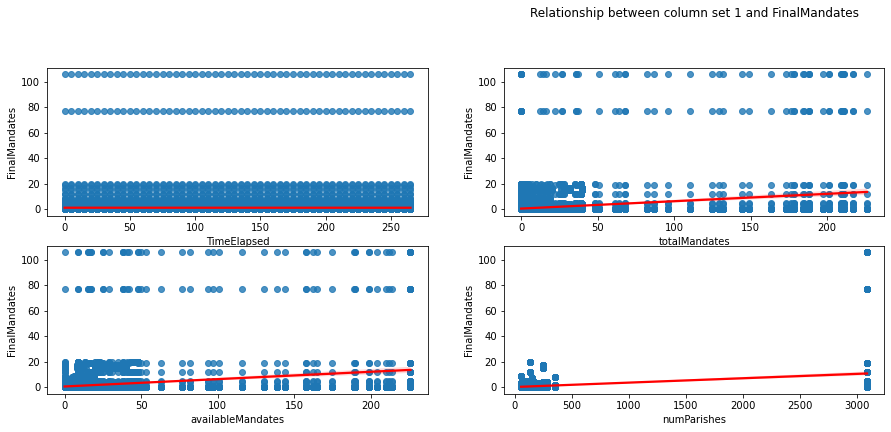

In [357]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize =(15, 6))
col = ['TimeElapsed','totalMandates','availableMandates','numParishes']
plotregplot('TimeElapsed', axes[0,0])
plotregplot('totalMandates', axes[0,1])
plotregplot('availableMandates', axes[1,0])
plotregplot('numParishes', axes[1,1])
plt.show()

#### **Findings:**
>1. Slight linear relationship between FinalMandates and 'totalMandates', 'availableMandates', 'numParishes'
2. FinalMadates is independent of TimeElapased

<AxesSubplot:>

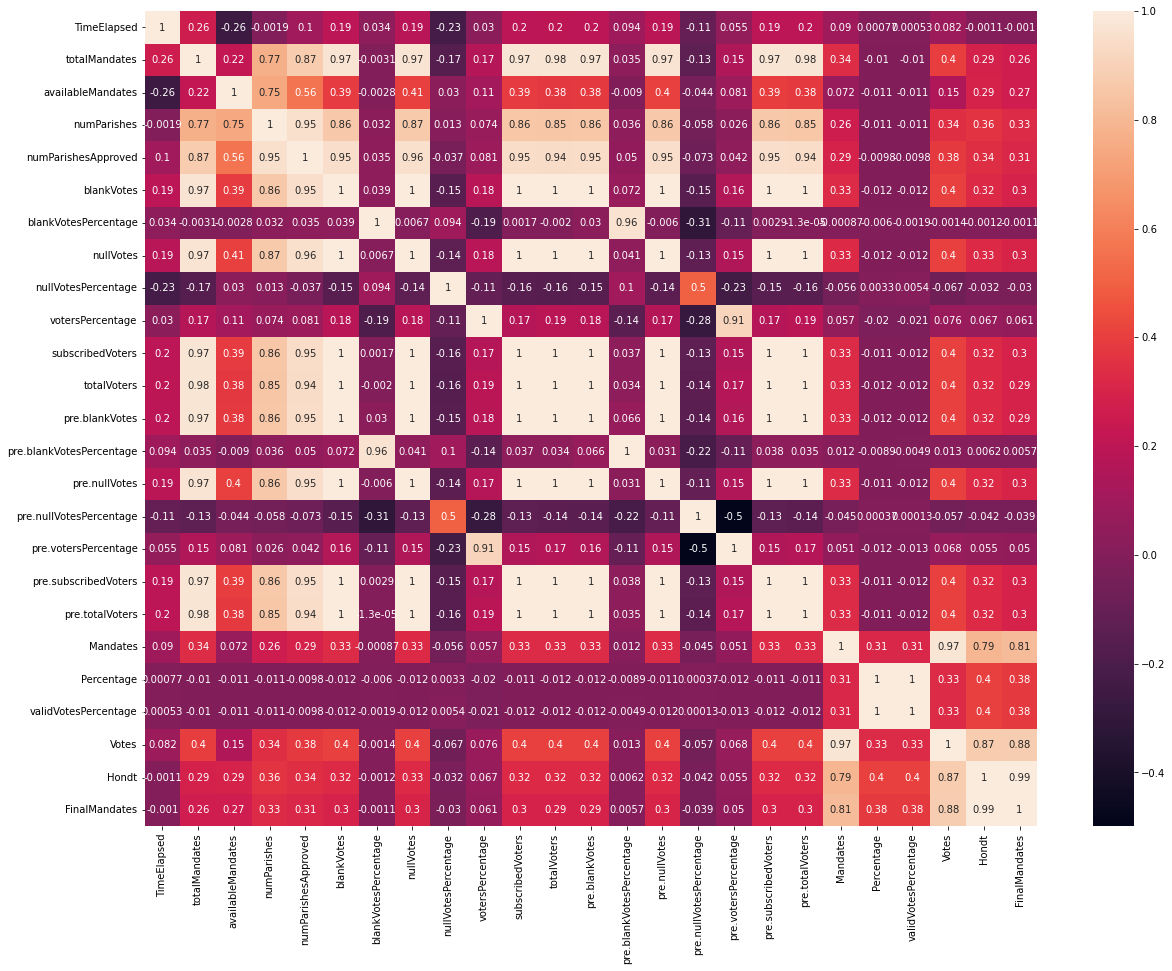

In [281]:
plt.figure(figsize = (20,15))
sns.heatmap(data = ucdata.corr(), annot= True)

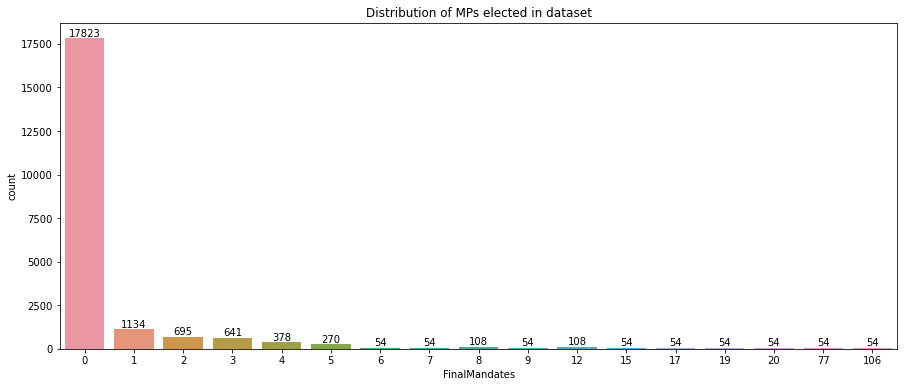

In [ ]:
for x in ucdata['FinalMandates'].sort_values().unique():
    print(f'\n>>> MP count = {x} <<<')
    #print(ucdata[ucdata['FinalMandates']==x].groupby('Party')['territoryName'].unique())

#### How many seats does each party win in different regions?

In [25]:
for party in ucdata['Party'].unique():
    print(f'\n>>> Party = {party} <<<')
    print(ucdata[ucdata['Party']==party].groupby('territoryName')['FinalMandates'].unique())


>>> Party = PS <<<
territoryName
Aveiro                   [7]
Açores                   [3]
Beja                     [2]
Braga                    [8]
Bragança                 [1]
Castelo Branco           [3]
Coimbra                  [5]
Faro                     [5]
Guarda                   [2]
Leiria                   [4]
Lisboa                  [20]
Madeira                  [3]
Portalegre               [2]
Porto                   [17]
Santarém                 [4]
Setúbal                  [9]
Território Nacional    [106]
Viana do Castelo         [3]
Vila Real                [2]
Viseu                    [4]
Évora                    [2]
Name: FinalMandates, dtype: object

>>> Party = PPD/PSD <<<
territoryName
Aveiro                  [6]
Açores                  [2]
Beja                    [0]
Braga                   [8]
Bragança                [2]
Castelo Branco          [1]
Coimbra                 [3]
Faro                    [3]
Guarda                  [1]
Leiria                  [5]
Lis